# Aggregation and Correlation Analysis of Various League Competions in Europe Using Groupby

Internet Link: https://www.kaggle.com/sanjeetsinghnaik/football-club-market-value-2021/version/1

Dataset is a combination of two categorical columns and five numerical columns: kaggle internet link provided above.
Visualizations were mainly bar/columns charts to accomodate all categorical fields with a few matplotlib scatter charts to highlight correlations.

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')

In [2]:
#Reading in the club dataset
df=pd.read_csv("club.csv",index_col=0)

In [3]:
#Checking head of dataframe
df.head(2)

,Club Name,Competition Name,Squad Size,Average Age Of Players,Market Value Of Club In Millions(£),Average Market Value Of Players In Millions(£),Market Value Of Top 18 Players In Millions(£)
0,Manchester City,Premier League,24,27.1,970.02,40.42,920.7
1,Paris Saint-Germain,Ligue 1,36,26.1,891.18,24.76,801.0


In [4]:
#Checking tail of dataframe
df.tail(2)

,Club Name,Competition Name,Squad Size,Average Age Of Players,Market Value Of Club In Millions(£),Average Market Value Of Players In Millions(£),Market Value Of Top 18 Players In Millions(£)
98,Lokomotiv Moscow,Premier Liga,29,25.0,87.32,3.01,77.85
99,Genoa CFC,Serie A,34,27.6,86.94,2.56,72.27


In [5]:
#dataframe shape
df.shape

(100, 7)

In [6]:
#dataframe size
df.size

700

In [7]:
#dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Club Name                                       100 non-null    object 
 1   Competition Name                                100 non-null    object 
 2   Squad Size                                      100 non-null    int64  
 3   Average Age Of Players                          100 non-null    float64
 4   Market Value Of Club In Millions(£)             100 non-null    float64
 5   Average Market Value Of Players In Millions(£)  100 non-null    float64
 6   Market Value Of Top 18 Players In Millions(£)   100 non-null    float64
dtypes: float64(4), int64(1), object(2)
memory usage: 6.2+ KB


In [8]:
#dataframe description
df.describe()

,Squad Size,Average Age Of Players,Market Value Of Club In Millions(£),Average Market Value Of Players In Millions(£),Market Value Of Top 18 Players In Millions(£)
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,27.740000,26.368000,263.793800,9.682600,243.451700
std,2.812742,1.417701,205.457212,7.747373,190.344411
min,22.000000,23.000000,86.940000,2.560000,72.270000
25%,26.000000,25.575000,114.147500,4.127500,105.795000
50%,27.000000,26.200000,182.060000,7.045000,170.550000
75%,29.000000,27.500000,345.622500,12.980000,321.412500
max,36.000000,30.100000,970.020000,40.420000,920.700000


In [9]:
#Checking names of columns in the dataset
df.columns

Index(['Club Name', 'Competition Name', 'Squad Size', 'Average Age Of Players',
       'Market Value Of Club In Millions(£)',
       'Average Market Value Of Players In Millions(£)',
       'Market Value Of Top 18 Players In Millions(£)'],
      dtype='object')

In [10]:
#Checking for missing values
df.isnull().sum()

Club Name                                         0
Competition Name                                  0
Squad Size                                        0
Average Age Of Players                            0
Market Value Of Club In Millions(£)               0
Average Market Value Of Players In Millions(£)    0
Market Value Of Top 18 Players In Millions(£)     0
dtype: int64

In [11]:
#Changing data types of integer columns with decimals
df["Average Age Of Players"]=df["Average Age Of Players"].astype("int64")
df["Market Value Of Club In Millions(£)"]=df["Market Value Of Club In Millions(£)"].astype("int64")
df["Average Market Value Of Players In Millions(£)"]=df["Average Market Value Of Players In Millions(£)"].astype("int64")
df["Market Value Of Top 18 Players In Millions(£)"]=df["Market Value Of Top 18 Players In Millions(£)"].astype("int64")

In [12]:
#Checking to see if changes have reflected
df.head(1)

,Club Name,Competition Name,Squad Size,Average Age Of Players,Market Value Of Club In Millions(£),Average Market Value Of Players In Millions(£),Market Value Of Top 18 Players In Millions(£)
0,Manchester City,Premier League,24,27,970,40,920


In [59]:
#Checking unique list of competition names in dataset

df['Competition Name'].unique()

array(['Premier League', 'Ligue 1', 'Bundesliga', 'LaLiga', 'Serie A',
       'Eredivisie', 'Liga Bwin', 'Premier Liga', 'Jupiler Pro League',
       'Série A', 'Championship', 'Süper Lig', 'Super League 1',
       'Liga Profesional', '1.HNL', 'Premiership'], dtype=object)

<AxesSubplot:title={'center':'Count of Each Competition in Data Set'}>

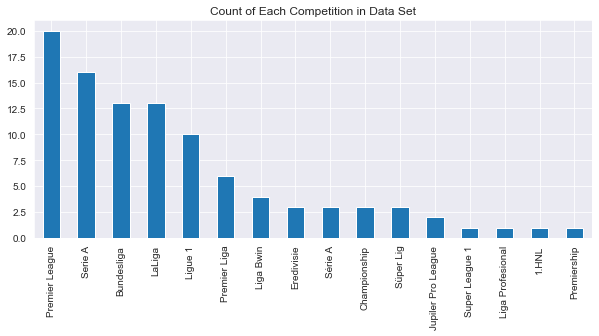

In [71]:
#Count of each competition in dataset
plt.figure(figsize=(10,4))
plt.title("Count of Each Competition in Data Set")
df['Competition Name'].value_counts().plot(kind='bar')

In [15]:
#PSG has the highest squad size in the dataset
(df.sort_values(by=['Squad Size'],ascending=False,inplace=False)).head(2)

,Club Name,Competition Name,Squad Size,Average Age Of Players,Market Value Of Club In Millions(£),Average Market Value Of Players In Millions(£),Market Value Of Top 18 Players In Millions(£)
1,Paris Saint-Germain,Ligue 1,36,26,891,24,801
99,Genoa CFC,Serie A,34,27,86,2,72


In [70]:
#Celta Vigo,Zenit St Petersburg and Atletico de Madrid with the lowest squad size in the dataset
(df.sort_values(by=['Squad Size'],ascending=False,inplace=False)).tail(3)

,Club Name,Competition Name,Squad Size,Average Age Of Players,Market Value Of Club In Millions(£),Average Market Value Of Players In Millions(£),Market Value Of Top 18 Players In Millions(£)
70,Celta de Vigo,LaLiga,22,27,127,5,123
58,Zenit St. Petersburg,Premier Liga,22,27,156,7,154
7,Atlético de Madrid,LaLiga,22,28,671,30,651


In [48]:
#Checking for club with the highset average age of players
df.sort_values(by=['Average Age Of Players'],ascending=False, inplace=False).head(1)

,Club Name,Competition Name,Squad Size,Average Age Of Players,Market Value Of Club In Millions(£),Average Market Value Of Players In Millions(£),Market Value Of Top 18 Players In Millions(£)
68,Burnley FC,Premier League,24,30,130,5,124


In [49]:
#Checking for club with the lowest average age of players
df.sort_values(by=['Average Age Of Players'],ascending=False, inplace=False).tail(1)

,Club Name,Competition Name,Squad Size,Average Age Of Players,Market Value Of Club In Millions(£),Average Market Value Of Players In Millions(£),Market Value Of Top 18 Players In Millions(£)
71,KRC Genk,Jupiler Pro League,25,23,120,4,112


In [17]:
#Grouping by competition for further analysis
competition=df.groupby("Competition Name")

<AxesSubplot:title={'center':'Total Squad Size For Each Competition'}, xlabel='Competition Name', ylabel='Squad Size'>

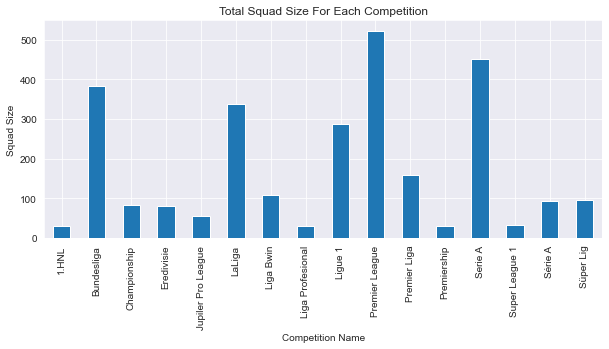

In [33]:
#The premier league has the highest squad size in the dataset
plt.figure(figsize=(10,4))
plt.title("Total Squad Size For Each Competition")
plt.ylabel('Squad Size')
competition['Squad Size'].sum().plot(kind='bar')

<AxesSubplot:title={'center':'Market Value For Each Competition'}, xlabel='Competition Name', ylabel='Market Value'>

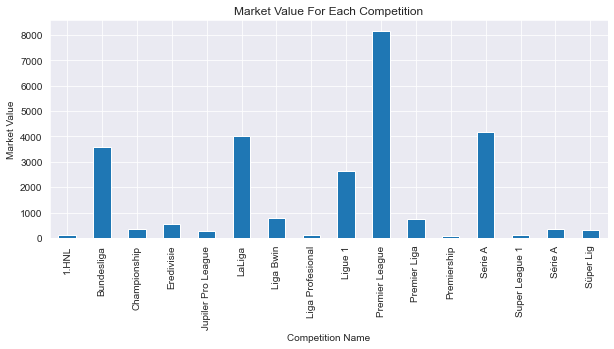

In [31]:
#The premier league is the most valued competition in the dataset
plt.figure(figsize=(10,4))
plt.title("Market Value For Each Competition")
plt.ylabel("Market Value")
competition['Market Value Of Club In Millions(£)'].sum().plot(kind='bar')

<AxesSubplot:title={'center':'Market Value of Top 18 Players'}, xlabel='Competition Name', ylabel='Market Value of Top 18 players'>

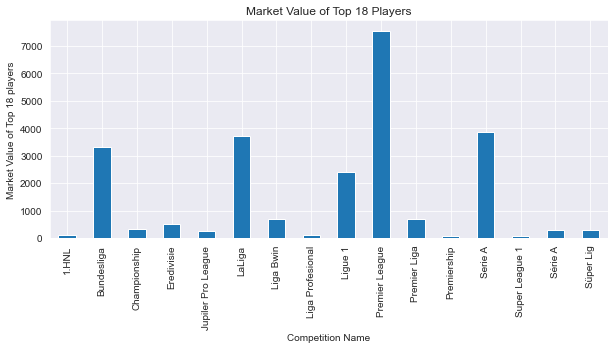

In [35]:
#Grouping based on Market Value of Top 18 Players
plt.figure(figsize=(10,4))
plt.title("Market Value of Top 18 Players")
plt.ylabel('Market Value of Top 18 players')
competition['Market Value Of Top 18 Players In Millions(£)'].sum().plot(kind='bar')

                    Average Age Of Players
Competition Name                          
1.HNL                            26.000000
Bundesliga                       24.615385
Championship                     26.000000
Eredivisie                       24.333333
Jupiler Pro League               23.500000
LaLiga                           26.923077
Liga Bwin                        25.750000
Liga Profesional                 27.000000
Ligue 1                          24.500000
Premier League                   26.450000
Premier Liga                     25.666667
Premiership                      27.000000
Serie A                          26.687500
Super League 1                   26.000000
Série A                          27.000000
Süper Lig                        26.000000


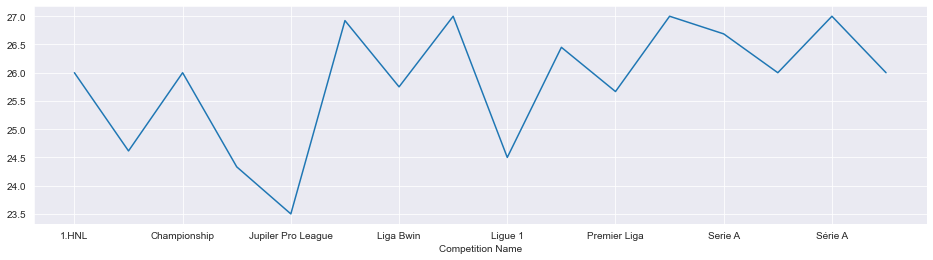

In [69]:
#Aggregating Average Age of Players based on competition
plt.figure(figsize=(16,4))
competition['Average Age Of Players'].mean().plot(kind='line')
print(competition['Average Age Of Players'].mean().to_frame())

In [41]:
#Checking for correlations, type of correlation used is spearman
df.corr('spearman')

,Squad Size,Average Age Of Players,Market Value Of Club In Millions(£),Average Market Value Of Players In Millions(£),Market Value Of Top 18 Players In Millions(£)
Squad Size,1.000000,-0.260231,-0.164588,-0.299069,-0.200283
Average Age Of Players,-0.260231,1.000000,0.061513,0.113133,0.066475
Market Value Of Club In Millions(£),-0.164588,0.061513,1.000000,0.981024,0.997717
Average Market Value Of Players In Millions(£),-0.299069,0.113133,0.981024,1.000000,0.985959
Market Value Of Top 18 Players In Millions(£),-0.200283,0.066475,0.997717,0.985959,1.000000


Text(0.5, 1.0, 'Correlation for Numerical Features')

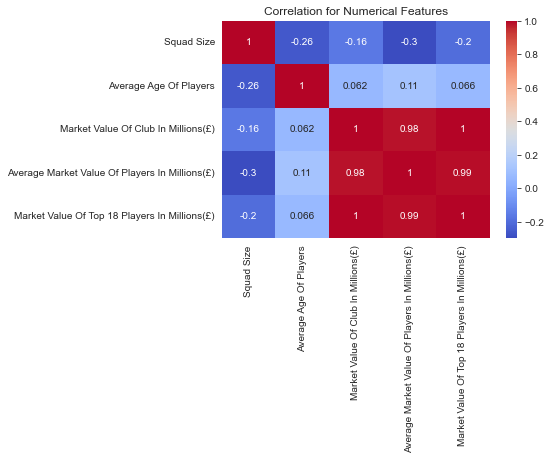

In [42]:
#Visualizing correlations
sns.heatmap(df.corr('spearman'), cmap='coolwarm',annot=True)
plt.title("Correlation for Numerical Features")

Text(0.5, 1.0, 'Market Value of Players against Market Value of Clubs')

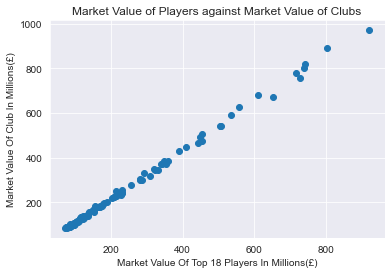

In [44]:
#Visualizing High Correlations Separately Using Matplotlib Scatter Chart
plt.scatter(x="Market Value Of Top 18 Players In Millions(£)",y='Market Value Of Club In Millions(£)',data=df)
plt.xlabel("Market Value Of Top 18 Players In Millions(£)")
plt.ylabel('Market Value Of Club In Millions(£)')
plt.title("Market Value of Players against Market Value of Clubs")

Text(0.5, 1.0, 'Market Value of Players against Average Market Value Of Players In Millions(£)')

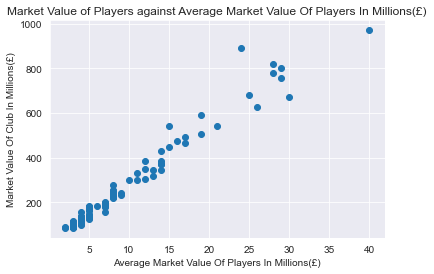

In [45]:
#Visualizing High Correlations Separately Using Matplotlib Scatter Chart
plt.scatter(x="Average Market Value Of Players In Millions(£)",y='Market Value Of Club In Millions(£)',data=df)
plt.xlabel("Average Market Value Of Players In Millions(£)")
plt.ylabel('Market Value Of Club In Millions(£)')
plt.title("Market Value of Players against Average Market Value Of Players In Millions(£)")

In [72]:
pd.pivot_table(data=df, index='Competition Name',aggfunc='sum',values='Market Value Of Club In Millions(£)',margins='Competition Name')

,Market Value Of Club In Millions(£)
Competition Name,
1.HNL,98
Bundesliga,3574
Championship,349
Eredivisie,542
Jupiler Pro League,270
LaLiga,4023
Liga Bwin,776
Liga Profesional,100
Ligue 1,2642


# WORK IN PROGRESS: ONGOING

# Conclusions

1. Based on information provided, the Premier League is the most valuable competition and has the highsest squad size when aggregated based on the dataset.
2. Ligue 1 club PSG has the highest squad size at 36 players while Celta Vigo,Zenit St Petersburg and Atletico de Madrid with the lowest squad size at 22 players each in the dataset.
3. Market Value Of Top 18 Players and Average Market Value of Players are highly correlated with the market values of the clubs.
4. English Club Burnley has the oldest squad in the dataset at an average age of 30 while KRC Genk the youngest squad with an average of 23.
5. Liga Professional, Serie A and Premiership boasts of the oldest squad in the dataset when aggregated while Jupiler Pro League the youngest squad in the dataset.